# Facial recognition
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
import os
from mlxtend.plotting import plot_confusion_matrix

In [2]:
# Load the compressed data into an object
face_data = np.load("ORL_faces.npz")

# Checking the contents of the file
face_data.files

['testY', 'testX', 'trainX', 'trainY']

In [3]:
# checking the shape of the items in the file
print("testY :",face_data['testY'].shape)
print("testX :",face_data['testX'].shape)
print("trainX :",face_data['trainX'].shape)
print("trainY :",face_data['trainY'].shape)

testY : (160,)
testX : (160, 10304)
trainX : (240, 10304)
trainY : (240,)


In [4]:
np.reshape(face_data['testX'], (160, 112, 92))

array([[[ 41.,  47.,  47., ...,  52.,  46.,  49.],
        [ 44.,  43.,  43., ...,  50.,  49.,  46.],
        [ 48.,  47.,  46., ...,  50.,  48.,  47.],
        ...,
        [ 43.,  44.,  44., ...,  36.,  37.,  35.],
        [ 45.,  44.,  45., ...,  37.,  39.,  33.],
        [ 46.,  41.,  47., ...,  35.,  37.,  38.]],

       [[ 44.,  43.,  32., ...,  52.,  48.,  52.],
        [ 44.,  38.,  33., ...,  51.,  51.,  54.],
        [ 41.,  42.,  29., ...,  50.,  53.,  53.],
        ...,
        [ 39.,  37.,  39., ...,  41.,  37.,  37.],
        [ 41.,  41.,  38., ...,  44.,  36.,  32.],
        [ 40.,  36.,  42., ...,  43.,  43.,  37.]],

       [[ 42.,  41.,  44., ...,  50.,  49.,  57.],
        [ 41.,  41.,  43., ...,  51.,  53.,  53.],
        [ 54.,  40.,  43., ...,  49.,  52.,  53.],
        ...,
        [ 38.,  37.,  36., ...,  40.,  43.,  40.],
        [ 38.,  36.,  37., ...,  44.,  42.,  39.],
        [ 37.,  39.,  37., ...,  42.,  43.,  41.]],

       ...,

       [[101., 100., 103

### Key Take-aways
    1. It can be inferred that trainX and testX are flattened images.
    2. It can be inferred that trainY and testY are corresponding labels of the images.
    3. There are 240 images for trainig and 160 images for testing.

In [5]:
# checking the data type of the items in the file
print("testY :",face_data['testY'].dtype)
print("testX :",face_data['testX'].dtype)
print("trainX :",face_data['trainX'].dtype)
print("trainY :",face_data['trainY'].dtype)

testY : uint8
testX : float64
trainX : float64
trainY : uint8


In [6]:
# Converting the data into numpy arrays
X = np.array(face_data['trainX'])
Y = np.array(face_data['trainY'])
x_test = np.array(face_data['testX'])
y_test = np.array(face_data['testY'])

In [7]:
# Reshaping the image array
X = X.reshape(240, 112, 92, 1)
x_test = x_test.reshape(160, 112, 92, 1)

#Checking the updated shape of the image array
print("Shape of X: ", X.shape)
print("Shape of x_test: ", x_test.shape)

Shape of X:  (240, 112, 92, 1)
Shape of x_test:  (160, 112, 92, 1)


In [8]:
# checking the values in the first image
print(X[0])

[[[48.]
  [49.]
  [45.]
  ...
  [56.]
  [56.]
  [54.]]

 [[45.]
  [52.]
  [39.]
  ...
  [52.]
  [50.]
  [51.]]

 [[45.]
  [50.]
  [42.]
  ...
  [48.]
  [53.]
  [50.]]

 ...

 [[50.]
  [48.]
  [50.]
  ...
  [45.]
  [46.]
  [46.]]

 [[45.]
  [54.]
  [49.]
  ...
  [46.]
  [47.]
  [47.]]

 [[51.]
  [51.]
  [51.]
  ...
  [47.]
  [46.]
  [46.]]]


In [9]:
# checking the values in the label
class_names = np.unique(Y)

#Printing the uniue labels
class_names

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=uint8)

In [10]:
# checking the values of the pixels the first image
print("Max pixel values: ", X[0].max())
print("Min pixel values: ", X[0].min())

Max pixel values:  234.0
Min pixel values:  11.0


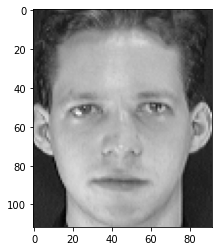

In [11]:
# Printing a sample image
plt.imshow(X[0],cmap='gray')

### Key Take-aways
    1. It can be inferred that teh values are not normalized.
    2. Normalize the pixel values by dividing them by 255.
    3. There are 20 uniqueue faces in the dataset.

In [12]:
# Normalizing the values
X = X/255
x_test = x_test/255

# Printing and checking the normalized values
print("X :", X)
print("x_test :", x_test)

X : [[[[0.18823529]
   [0.19215686]
   [0.17647059]
   ...
   [0.21960784]
   [0.21960784]
   [0.21176471]]

  [[0.17647059]
   [0.20392157]
   [0.15294118]
   ...
   [0.20392157]
   [0.19607843]
   [0.2       ]]

  [[0.17647059]
   [0.19607843]
   [0.16470588]
   ...
   [0.18823529]
   [0.20784314]
   [0.19607843]]

  ...

  [[0.19607843]
   [0.18823529]
   [0.19607843]
   ...
   [0.17647059]
   [0.18039216]
   [0.18039216]]

  [[0.17647059]
   [0.21176471]
   [0.19215686]
   ...
   [0.18039216]
   [0.18431373]
   [0.18431373]]

  [[0.2       ]
   [0.2       ]
   [0.2       ]
   ...
   [0.18431373]
   [0.18039216]
   [0.18039216]]]


 [[[0.23529412]
   [0.23529412]
   [0.24313725]
   ...
   [0.15686275]
   [0.20784314]
   [0.18039216]]

  [[0.22745098]
   [0.28627451]
   [0.21176471]
   ...
   [0.13333333]
   [0.19607843]
   [0.2       ]]

  [[0.26666667]
   [0.30196078]
   [0.31372549]
   ...
   [0.14117647]
   [0.19607843]
   [0.19215686]]

  ...

  [[0.09411765]
   [0.56078431]
   

In [13]:
# Splitting the X and Y into train and validation set
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 92, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 23, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4928)              0

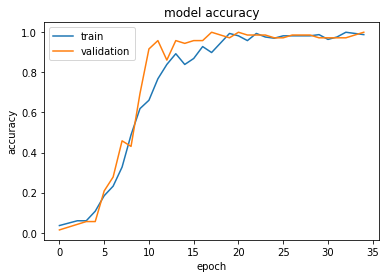

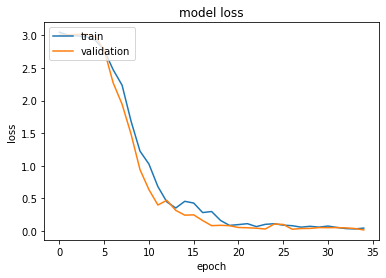

In [14]:
# Defining the sequential neural network
cnn_model1 = Sequential()

# Defining the first convolutional layer with 64 filters
cnn_model1.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape = (112, 92, 1)))
# Defining the max pooling layer
cnn_model1.add(MaxPool2D(pool_size = (2, 2)))           

# Defining the second convolutional layer with 32 filters
cnn_model1.add(Conv2D(32, (3, 3), padding='same', activation = 'relu'))
# Defining the max pooling layer
cnn_model1.add(MaxPool2D(pool_size = (2, 2)))

# Defining the third convolutional layer with 16 filters
cnn_model1.add(Conv2D(32, (3, 3), padding='same', activation = 'relu'))               
# Defining the max pooling layer
cnn_model1.add(MaxPool2D(pool_size = (2, 2)))

# Flattening the image before passing the data to dense layers
cnn_model1.add(Flatten())

# Defining the first dense layer with 512 neurons
cnn_model1.add(Dense(units = 512, activation = 'relu'))          
# Adding dropout of 20%
cnn_model1.add(Dropout(0.2))
    
# Defining the second dense layer with 256 neurons
cnn_model1.add(Dense(units = 256, activation = 'relu'))      
# Adding dropout of 20%
cnn_model1.add(Dropout(0.2))
               
# Defining the third dense layer with 128 neurons
cnn_model1.add(Dense(units = 128, activation = 'relu'))   
# Adding dropout of 20%
cnn_model1.add(Dropout(0.2))

# Defining the output dense layer with 20 neurons
cnn_model1.add(Dense(units = 20, activation = 'softmax'))

# Print the summary of the model
cnn_model1.summary()

# Defining learnig rate decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                    .001,
                    decay_steps=30,
                    decay_rate=0.83,
                    staircase=True)

# Compile the model
cnn_model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history1=cnn_model1.fit(
        x_train,
        y_train,
        batch_size=16,
        epochs=35,
        verbose=1,
        validation_data=(x_val,y_val)
        )

# Plot history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
# Defining a function to make prediction from the highest probability
def get_preds(elem_list):
    y_pred = []
    for elem in elem_list:
        index = np.argmax(elem)
        y_pred.append(index)
    return y_pred

In [16]:
# defining a function to print the report for the model on given data
def get_report(x, y, class_labels, user_model):
    
    # Making predictions using the get_preds() function
    preds = get_preds(user_model.predict(x))

    # Printing the classification report for training
    print(classification_report(y, preds))

    # Getting the confusion matrix for trainng
    cm = confusion_matrix(y, preds)

    # Plotting the confusion matrix for training
    plot_confusion_matrix(cm, figsize=(12,12), class_names=class_labels)

***TRAINING******TRAINING******TRAINING******TRAINING******TRAINING******TRAINING******TRAINING******TRAINING******TRAINING***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         8
        

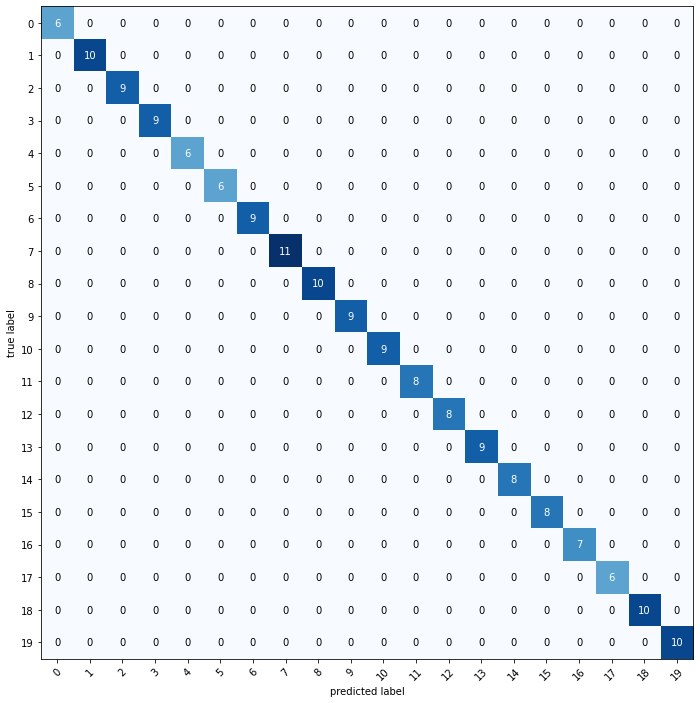

In [17]:
print('***TRAINING***'*9)

# Getting the report for the model on training data
get_report(x_train, y_train, class_names, cnn_model1)

***VALIDATION******VALIDATION******VALIDATION******VALIDATION******VALIDATION******VALIDATION******VALIDATION***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.0

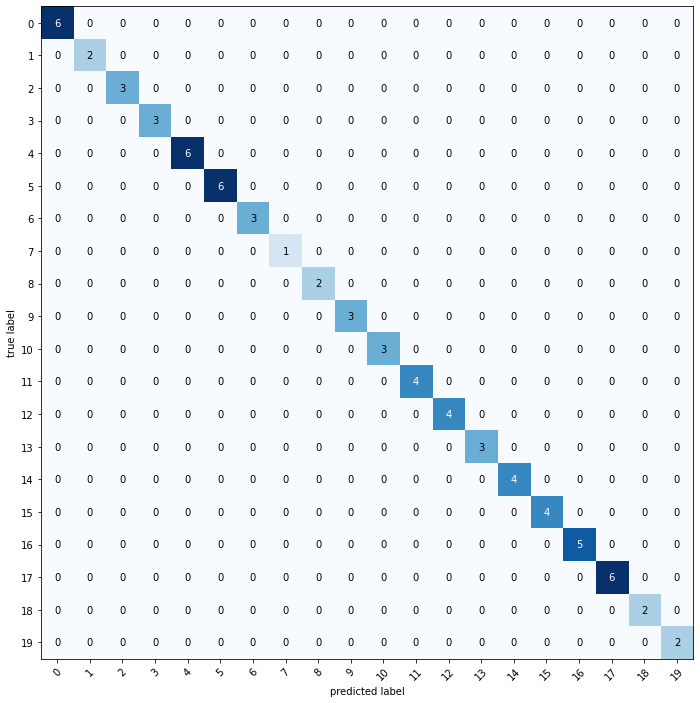

In [18]:
print('***VALIDATION***'*7)

# Getting the report for the model on validation data
get_report(x_val, y_val, class_names, cnn_model1)

***TESTING******TESTING******TESTING******TESTING******TESTING******TESTING******TESTING******TESTING******TESTING***
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      0.75      0.86         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       0.67      1.00      0.80         8
           8       1.00      1.00      1.00         8
           9       1.00      0.75      0.86         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15     

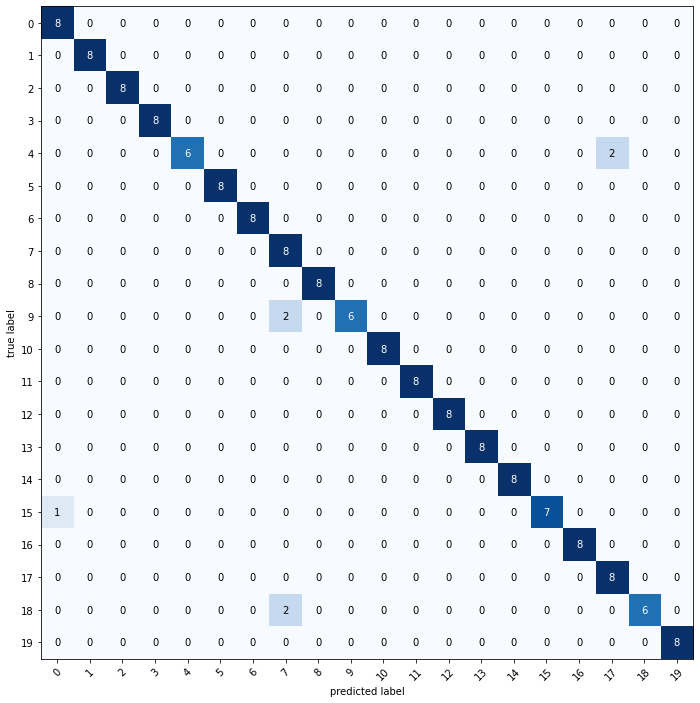

In [19]:
print('***TESTING***'*9)

# Getting the report for the model on validation data
get_report(x_test, y_test, class_names, cnn_model1)